# Step 6: Context Analysis

In this notebook, we will take a look at the distributions of the following features:
1. Number of followers
2. Number of friends
3. Verified status
4. Number of user listings
5. Account age
6. Tweet frequency
7. Favorite frequency

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from tep.accountCollector import AccountCollector
ac = AccountCollector()

{"created_at": "Thu May 01 12:37:22 +0000 2014", "description": "Student of Information Systems @TUDarmstadt. Particularly interested in AI/ML, currently working on tweet engagement prediction using deep learning models.", "favourites_count": 395, "followers_count": 58, "friends_count": 226, "id": 2472450259, "id_str": "2472450259", "lang": "en", "listed_count": 7, "location": "Darmstadt, Deutschland", "name": "Felix Peters", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url": "http://pbs.twimg.com/profile_images/600953861629734913/7y_RkdW4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/600953861629734913/7y_RkdW4_normal.jpg", "profile_link_color": "224F82", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profi

In [4]:
# load user IDs from file
user_ids = ac.load_user_ids(fname="data/user_ids.txt")
len(user_ids)

1061

In [6]:
from tep.userAnalyzer import UserAnalyzer
ua = UserAnalyzer()

{"created_at": "Thu May 01 12:37:22 +0000 2014", "description": "Student of Information Systems @TUDarmstadt. Particularly interested in AI/ML, currently working on tweet engagement prediction using deep learning models.", "favourites_count": 395, "followers_count": 58, "friends_count": 226, "id": 2472450259, "id_str": "2472450259", "lang": "en", "listed_count": 7, "location": "Darmstadt, Deutschland", "name": "Felix Peters", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url": "http://pbs.twimg.com/profile_images/600953861629734913/7y_RkdW4_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/600953861629734913/7y_RkdW4_normal.jpg", "profile_link_color": "224F82", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profi

In [7]:
# get user objects
users = ua.get_users(user_ids)
len(users)

Error occurred when collecting tweets for user 804879129766141952


1060

In [8]:
users[:3]

[User(ID=12, ScreenName=jack),
 User(ID=418, ScreenName=dens),
 User(ID=586, ScreenName=sacca)]

In [10]:
# extract features
features = ua.extract_user_features(users)
features.shape

(1060, 7)

In [11]:
from tep.utils import save_array
save_array(features, "data/user_features.bc")

In [12]:
# create data frame
import pandas as pd
df = pd.DataFrame(data=features, columns=ua.feature_map)
df.head()

,followers,friends,verified,listings,age,tweet_freq,fav_freq
0,4202709.0,3506.0,1.0,27483.0,4459.0,5.306571,4.763624
1,87815.0,2478.0,1.0,4540.0,4353.0,15.268091,3.084080
2,1847988.0,1387.0,1.0,12958.0,4346.0,15.604004,63.376208
3,23957.0,693.0,1.0,1352.0,4345.0,2.520829,1.194937
4,1524731.0,1355.0,1.0,14297.0,4344.0,11.466160,9.486648


## Number of followers

In [15]:
from tep.vizUtils import plot_bars
from tep.utils import class_distribution, discretize
pd.options.display.float_format = '{:,.2f}'.format

In [16]:
df['followers'].describe()

count         1,060.00
mean      2,868,728.15
std      10,911,435.54
min               0.00
25%          16,167.00
50%          67,833.00
75%         456,674.75
max     109,517,347.00
Name: followers, dtype: float64

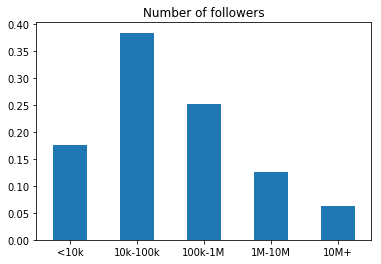

In [17]:
classes = [9999, 99999, 999999, 9999999]
labels = ['<10k', '10k-100k', '100k-1M', '1M-10M', '10M+']
plot_bars(df['followers'], classes, labels, "Number of followers")

In [18]:
classes = discretize(df['followers'], classes)
class_distribution(classes, "Number of followers", normalize=True)

0.00   0.18
1.00   0.38
2.00   0.25
3.00   0.13
4.00   0.06
Name: Number of followers, dtype: float64

## Number of friends

In [19]:
df['friends'].describe()

count     1,060.00
mean      5,523.88
std      32,014.18
min           0.00
25%         286.50
50%         886.00
75%       2,438.75
max     621,788.00
Name: friends, dtype: float64

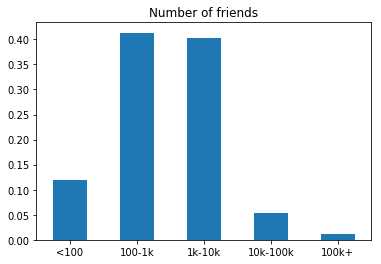

In [20]:
classes = [99, 999, 9999, 99999]
labels = ['<100', '100-1k', '1k-10k', '10k-100k', '100k+']
plot_bars(df['friends'], classes, labels, "Number of friends")

In [22]:
classes = discretize(df['friends'], classes)
class_distribution(classes, "Number of friends", normalize=True)

0.00   0.12
1.00   0.41
2.00   0.40
3.00   0.05
4.00   0.01
Name: Number of friends, dtype: float64

## Verified status

In [23]:
df['verified'].astype('bool').describe()

count     1060
unique       2
top       True
freq       866
Name: verified, dtype: object

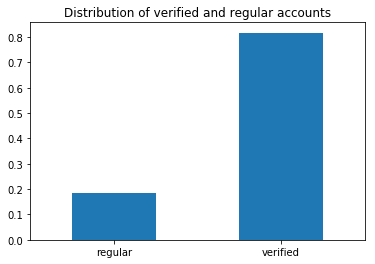

In [25]:
classes = [0]
labels = ['regular', 'verified']
plot_bars(df['verified'], classes, labels, "Distribution of verified and regular accounts")

In [26]:
classes = discretize(df['verified'], classes)
class_distribution(classes, "Regular vs. verified accounts", normalize=True)

0.00   0.18
1.00   0.82
Name: Regular vs. verified accounts, dtype: float64

## User listings

In [27]:
df['listings'].describe()

count     1,060.00
mean      6,918.77
std      26,305.46
min           0.00
25%         401.75
50%       1,343.00
75%       3,947.00
max     609,411.00
Name: listings, dtype: float64

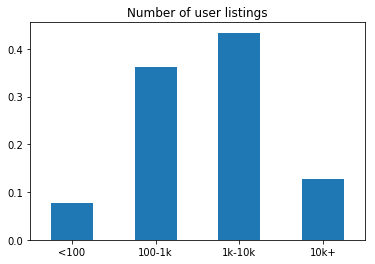

In [28]:
classes = [99, 999, 9999]
labels = ['<100', '100-1k', '1k-10k', '10k+']
plot_bars(df['listings'], classes, labels, "Number of user listings")

In [29]:
classes = discretize(df['listings'], classes)
class_distribution(classes, "Number of user listings", normalize=True)

0.00   0.08
1.00   0.36
2.00   0.43
3.00   0.13
Name: Number of user listings, dtype: float64

## Account age

In [30]:
df['age'].describe()

count   1,060.00
mean    3,020.96
std       675.36
min       292.00
25%     2,680.00
50%     3,207.00
75%     3,410.50
max     4,459.00
Name: age, dtype: float64

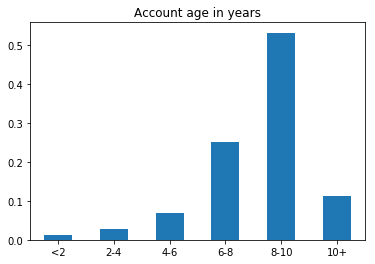

In [32]:
classes = [730, 1460, 2190, 2920, 3650]
labels = ['<2', '2-4', '4-6', '6-8', '8-10', '10+']
plot_bars(df['age'], classes, labels, "Account age in years")

In [33]:
classes = discretize(df['age'], classes)
class_distribution(classes, "Account age distribution", normalize=True)

0.00   0.01
1.00   0.03
2.00   0.07
3.00   0.25
4.00   0.53
5.00   0.11
Name: Account age distribution, dtype: float64

## Tweet frequency

In [34]:
df['tweet_freq'].describe()

count   1,060.00
mean        7.62
std        32.44
min         0.00
25%         1.07
50%         2.49
75%         5.85
max       756.00
Name: tweet_freq, dtype: float64

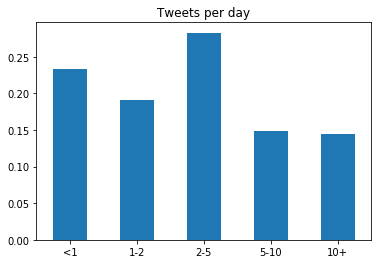

In [35]:
classes = [0.99, 1.99, 4.99, 9.99]
labels = ['<1', '1-2', '2-5', '5-10', '10+']
plot_bars(df['tweet_freq'], classes, labels, "Tweets per day")

In [36]:
classes = discretize(df['tweet_freq'], classes)
class_distribution(classes, "Tweets per day", normalize=True)

0.00   0.23
1.00   0.19
2.00   0.28
3.00   0.15
4.00   0.14
Name: Tweets per day, dtype: float64

## Favorite frequency

In [37]:
df['fav_freq'].describe()

count   1,060.00
mean        1.76
std         5.97
min         0.00
25%         0.05
50%         0.34
75%         1.32
max       107.19
Name: fav_freq, dtype: float64

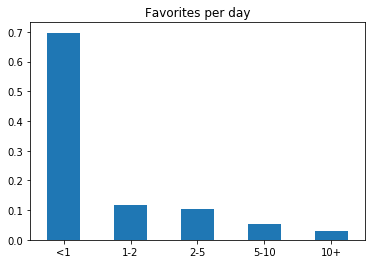

In [38]:
classes = [0.99, 1.99, 4.99, 9.99]
labels = ['<1', '1-2', '2-5', '5-10', '10+']
plot_bars(df['fav_freq'], classes, labels, "Favorites per day")

In [39]:
classes = discretize(df['fav_freq'], classes)
class_distribution(classes, "Favorites per day", normalize=True)

0.00   0.70
1.00   0.12
2.00   0.10
3.00   0.05
4.00   0.03
Name: Favorites per day, dtype: float64